# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

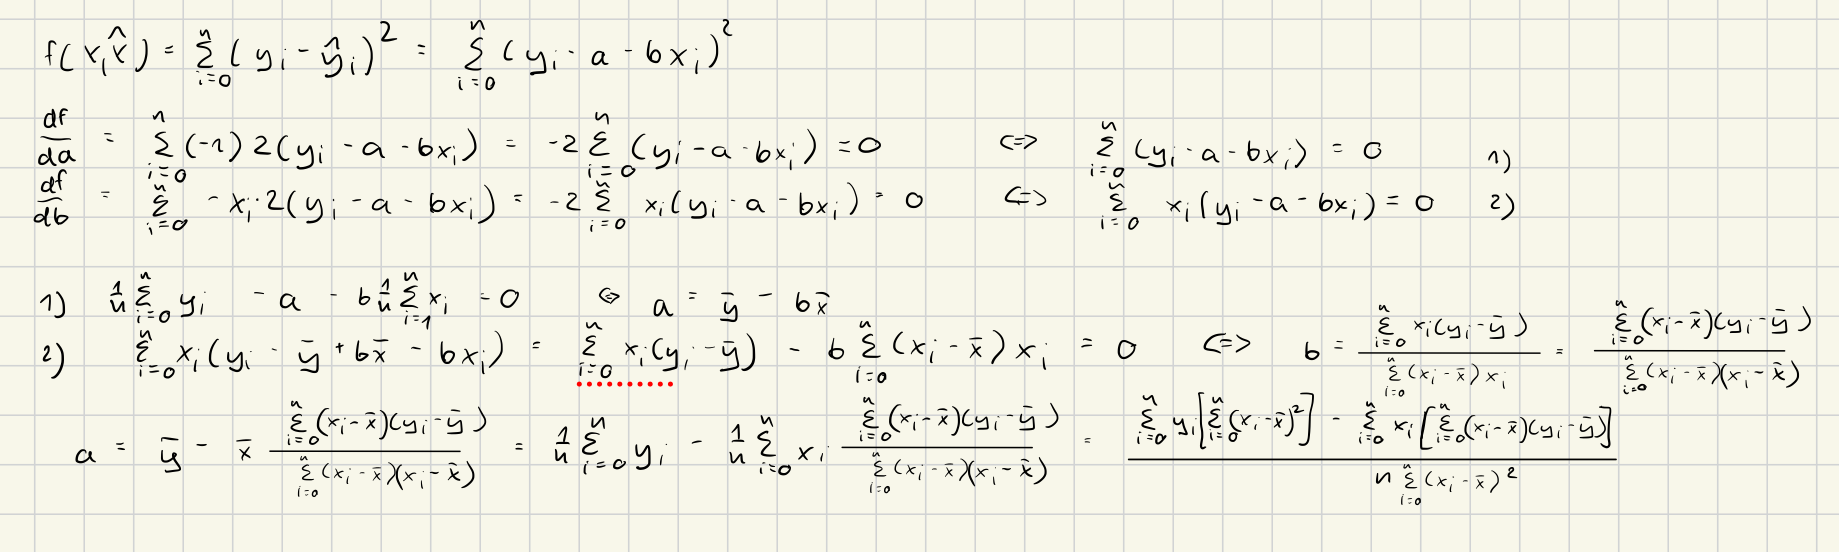

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

In general this is the unique solution for a and b since the loss function is quadratic and convex in a and b. Hence it will have exactly one global minimum for the values of a and b indicated above 

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

The solutions wouldn't change since the mean sqaured error = 1/n * sum of sqaured errors. For the same n input-output pairs (x_i, y_i), 1/n is a monotonically increasing transformation of sum of sqaured errors function. Hence minimum sum of sqaured error if and only if minimum mean squared error. 

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

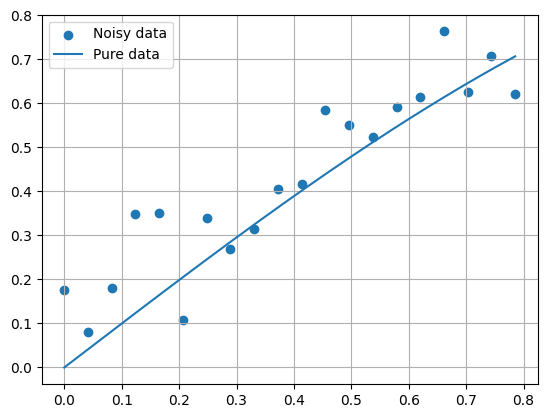

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def generate_sin(x, epsilon):
    eta = np.random.normal(0, epsilon, len(x))
    y = np.sin(x) + eta
    return y

n_samples = 20

# TODO: create noisy function
x = np.linspace(0, np.pi/4, n_samples)
y = generate_sin(x, 0.1)

# TODO: create true function
x_pure = np.linspace(0, np.pi/4, 1000)
y_pure = np.sin(x_pure)

# TODO: plot data, line
plt.scatter(x,y, label="Noisy data")
plt.plot(x_pure, y_pure, label="Pure data")
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

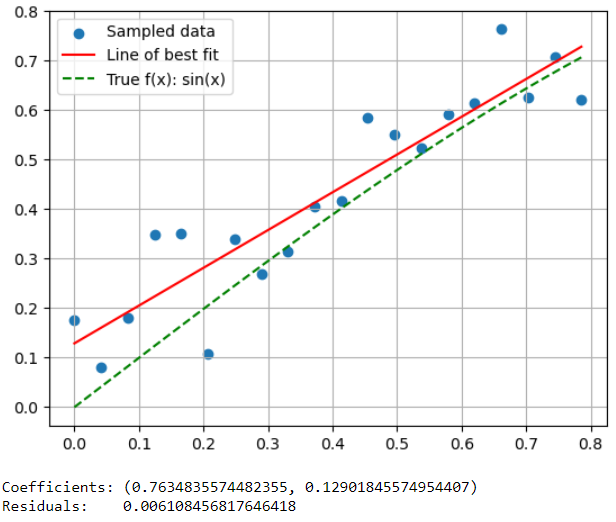

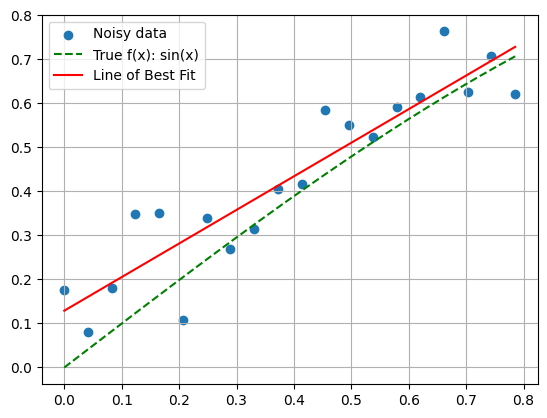

Coefficients: (0.12901845574954407, 0.7634835574482355)
Residuals:    0.12216913635292838


In [16]:
def compute_sos(y_true, y_pred):
    sos = np.sum((y_true-y_pred)**2)
    return sos

def lin_reg(xs, ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    b = np.sum((xs - x_mean) * (ys - y_mean)) / np.sum((xs - x_mean) ** 2)
    a = y_mean - b * x_mean
    y_pred = a + b * xs
    res = compute_sos(ys, y_pred)
    return a, b, res

# TODO: generate line of best fit
a, b, res = lin_reg(x,y)
y_best = b*x+a


# TODO: plot line of best fit, data, etc
plt.scatter(x,y, label="Noisy data")
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color = "green", linestyle='--')
plt.plot(x, y_best, label='Line of Best Fit', color = "red")

# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

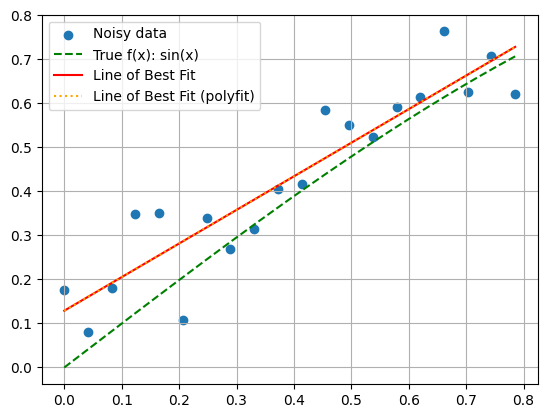

Coefficients:      (0.12901845574954407, 0.7634835574482355)
Residuals:         0.12216913635292838
Coefficients (np): (0.12901845574954407, 0.7634835574482355)
Residuals (np):    0.12216913635292838


In [17]:
# TODO: use np polyfit here
b_np, a_np = np.polyfit(x, y, deg=1)
y_best_np = b_np * x + a_np
res_np = compute_sos(y, y_best_np)

# TODO: plot everything you need to
plt.scatter(x,y, label="Noisy data")
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color = "green", linestyle='--')
plt.plot(x, y_best, label='Line of Best Fit', color = "red")
plt.plot(x, y_best_np, label='Line of Best Fit (polyfit)', color='orange', linestyle=':')

# make it pretty
plt.grid()
plt.legend()
plt.show()

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

For degree 1, the 'ployfit' function produces the exact same coefficeint values and the same sum of squeared residuals as the self coded function in the previous questions. This suggests that for degree 1, the polyfit function implementation is exactly the same as the one of our function. 

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

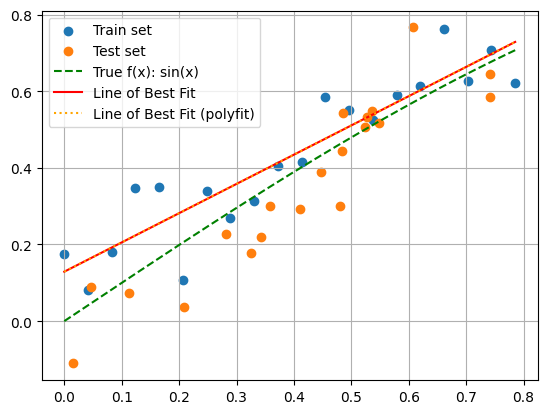

Coefficients:  (0.12901845574954407, 0.7634835574482355)
Train loss:    0.010592701440221477
Test loss:     0.010337776566094251


In [18]:
def compute_mse(y_true, y_pred, a, b):
    # TODO: your code here
    mse = 1/len(y_true) * compute_sos(y_true, y_pred)
    return mse

x_test = np.random.uniform(0, np.pi/4, n_samples)
y_test = generate_sin(x_test, 0.1)

plt.scatter(x, y, label="Train set")
plt.scatter(x_test, y_test, label="Test set")

# TODO: plot data, lines of best fit, true function, make it pretty
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color = "green", linestyle='--')
plt.plot(x, y_best, label='Line of Best Fit', color = "red")
plt.plot(x, y_best_np, label='Line of Best Fit (polyfit)', color='orange', linestyle=':')
plt.grid()
plt.legend()
plt.show()

test_loss = compute_mse(x_test, y_test, a, b)
train_loss = compute_mse(x, y, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

It is expected that the train loss will be lower as the used coefficients minimize the training data that includes the true DGP values augmented by the noise realizations. Hence if new data is generated founded by x values that are expected to be evenly disitrbuted on the interval 0 to pi/4 (unfirm disitrbuted), also new error realizations are generated that are independent of the training errors realizations that the model accounted for. Hence the test loss is expected to be bigger which is an indication of overfitting.
As data scientsit we should aim to actaully minimize the test_loss.   

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

The performance of the linear model as measured by the test_loss is negatively affected by bigger epsilon which leads to increased noise in the data.
As n increases the linear models tend to perfrom better as indicated by decreasing MSE.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

[ 0.07920134  0.10608717  0.31596119  0.92504482  1.00273497  1.12359078
  1.39240228  0.92461981  0.29338295  0.38799785 -0.42777607 -0.56826431
 -0.74937223 -0.57310478 -1.14553546 -1.13468797 -0.85685698 -0.74690837
 -0.09937228 -0.2159863 ]
[-0.22949373  0.23713546  0.51460622  1.22307289  1.15928443  1.01409474
  0.67068622  0.90459651  0.27590432 -0.14435963  0.07301137 -0.41255887
 -0.55155215 -0.8520278  -0.82521837 -1.09960538 -1.04401505 -0.47789381
 -0.4853814  -0.13790996]


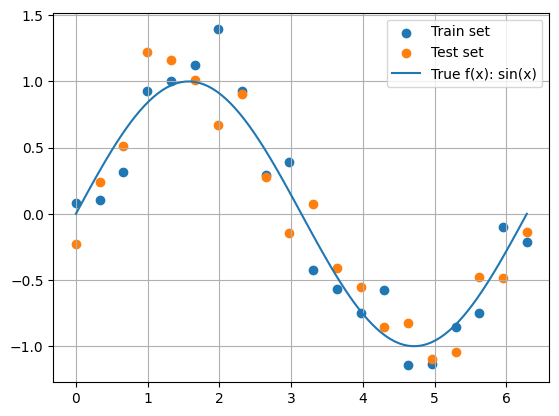

In [25]:
# TODO: generate new data and plot
n_samples = 20
x = np.linspace(0, np.pi * 2, n_samples)
y_train = generate_sin(x, 0.2)
y_test = generate_sin(x, 0.2)

print(y_train)
print(y_test)

x_pure = np.linspace(0, np.pi * 2, 100)
y_pure = np.sin(x_pure)

plt.scatter(x, y_train, label="Train set")
plt.scatter(x, y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [32]:
train_losses = []
test_losses = []
coefficients = []

# Loop through degrees
for d in range(1, 21):
    # Fit polynomial of degree d to the training set
    coeffs = np.polyfit(x, y_train, d)
    
    # Compute predicted values for train and test sets
    y_pred_train = np.polyval(coeffs, x)
    y_pred_test = np.polyval(coeffs, x_test)
    
    # Compute train and test losses
    train_loss = np.mean((y_train - y_pred_train) ** 2)
    test_loss = np.mean((y_test - y_pred_test) ** 2)
    
    # Save train and test losses, and coefficients
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    coefficients.append(coeffs)

# Convert lists to arrays for easier manipulation
train_losses = np.array(train_losses)
test_losses = np.array(test_losses)
coefficients = np.array(coefficients)


/var/folders/33/j64tbt1s0bj6tb8v7dw6x2j80000gn/T/ipykernel_12447/1729971640.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_train, d)
/var/folders/33/j64tbt1s0bj6tb8v7dw6x2j80000gn/T/ipykernel_12447/1729971640.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_train, d)
/var/folders/33/j64tbt1s0bj6tb8v7dw6x2j80000gn/T/ipykernel_12447/1729971640.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_train, d)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

For some reason I keep getting error like one above and I can't figure out what is the problem. I hope the soltuions will help me. Also this prevents me from solving 5.3 so I proceed to question 6.
The only thing I notice is that the training set contains of only 20 observations so with degrees 30 we have exact fit and 0 train loss (but huge overfitting).  

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

In [ ]:
# TODO: your code here

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

In [ ]:
# TODO: your code here

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. To asses whether polynomial models start to overfit I would look at the training vs test sample accuracy. If they are close to each other this suggests well fitted model however test MSE significantly bigger and suspiciosuly small training MSE (singifcantly lower than epsilon) suggest overfit.
2. The higher the polynomil degree the closer the training sample fit in gnereal. 
3. OVerfitting will occur at later degree than for sample 20 as the noise realization is more normally disitrubted. 
4. Increasing number of training points will decrease thh variability around estimated parameters since there is more information and the consistency property is more likely to realize. Hence the models will likely perfrom better in test data hence their felxiblity will be in general hgiher with more training points. 